# Problem Statement

The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
Four &quot;Corgie&quot; model vehicles were used for the experiment: a double decker bus, Cheverolet
van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

The points distribution for this case is as follows:
1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)
2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)
3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points
4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

In [161]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [162]:
vehc_df = pd.read_csv("vehicle.csv")
vehc_df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [163]:
vehc_df.shape

(846, 19)

In [164]:
vehc_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [165]:
vehc_df.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [166]:
vehc_df["class"]= vehc_df["class"].replace({'car':0,'van':1,'bus':2})

In [167]:
vehc_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [168]:
vehc_df['class'].value_counts()

0    429
2    218
1    199
Name: class, dtype: int64

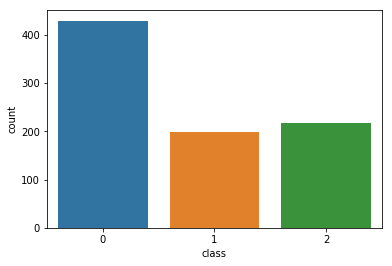

In [169]:
sns.countplot(vehc_df['class'])

#### We can see that few columns above such as circularity,distance_circularity,radius_ratio etc. have missing values, so lets do the missing value treatment first.

#### As per observation above, there are three classes of silhoute hence it would be better to do the missing value and outlier treatment seperately for the 3 classes as the stats for the classes are different.

#### Splitting the entire dataframe i.e. vehc_df into 3 different df's based on class and performing missing value and outlier treatment on each

In [170]:
#vehicles of type car
vehc_car= vehc_df[vehc_df["class"]==0]

In [171]:
#missing value treatment for type car
vehc_car.fillna(vehc_car.median(),inplace=True)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


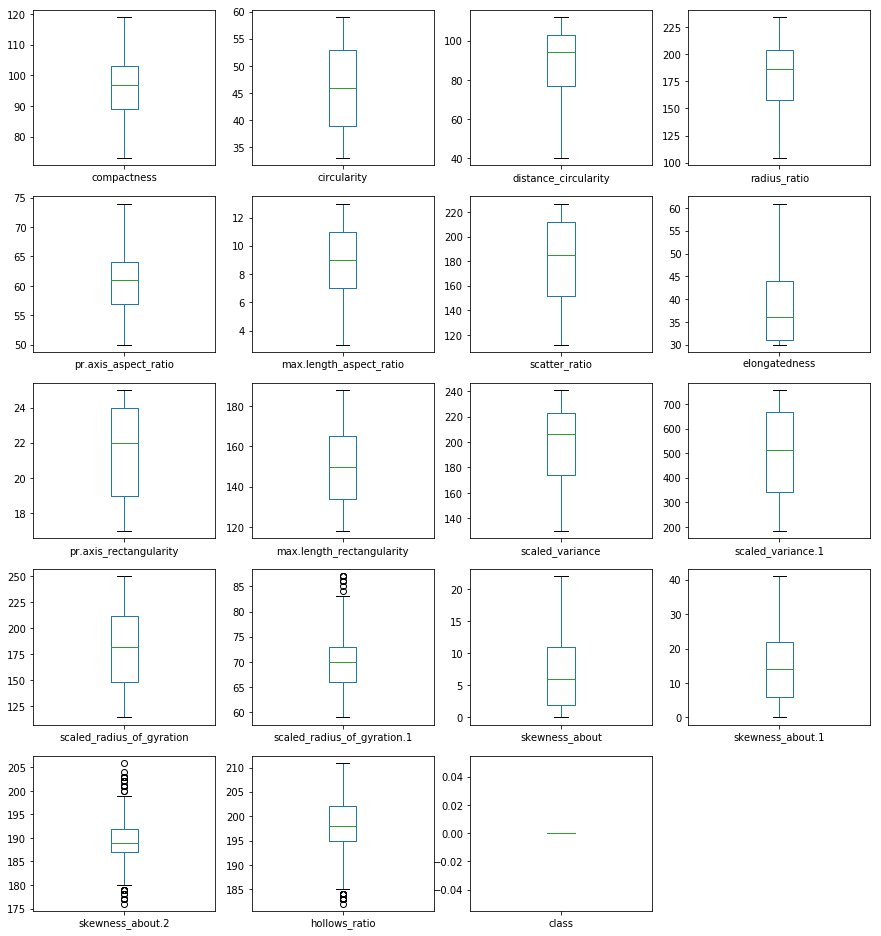

In [172]:
# box and whisker plots
vehc_car.plot(kind='box', subplots=True,layout = (6,4),sharex=False, sharey=False,figsize=(15,20))
plt.show()

In [173]:
# function for outlier treatment
def findOutlier(df,col_name):
    for col in col_name:
        q75,q25=np.percentile(df[col],[75,25])
        iqr=q75-q25
        qmin=q25-(1.5*iqr)
        qmax=q75+(1.5*iqr)
        df.loc[(df[col]<qmin),col]=df[col].median()#qmin#df[col].median()#min()#qmin
        df.loc[(df[col]>qmax),col]=df[col].median()#qmax#df[col].median()#.max()#qmax
    return df

#outlier treatment for vehicle of type car
vehc_car = findOutlier(vehc_car,vehc_car.columns)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


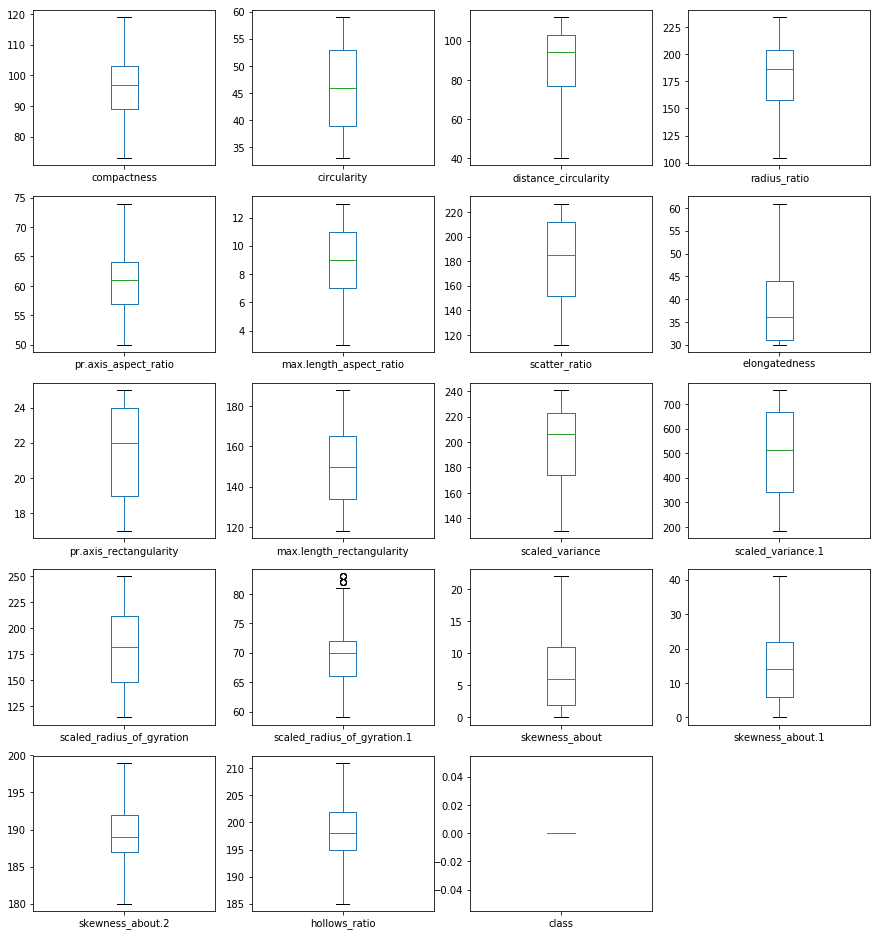

In [174]:
# box and whisker plots
vehc_car.plot(kind='box', subplots=True,layout = (6,4),sharex=False, sharey=False,figsize=(15,20))
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


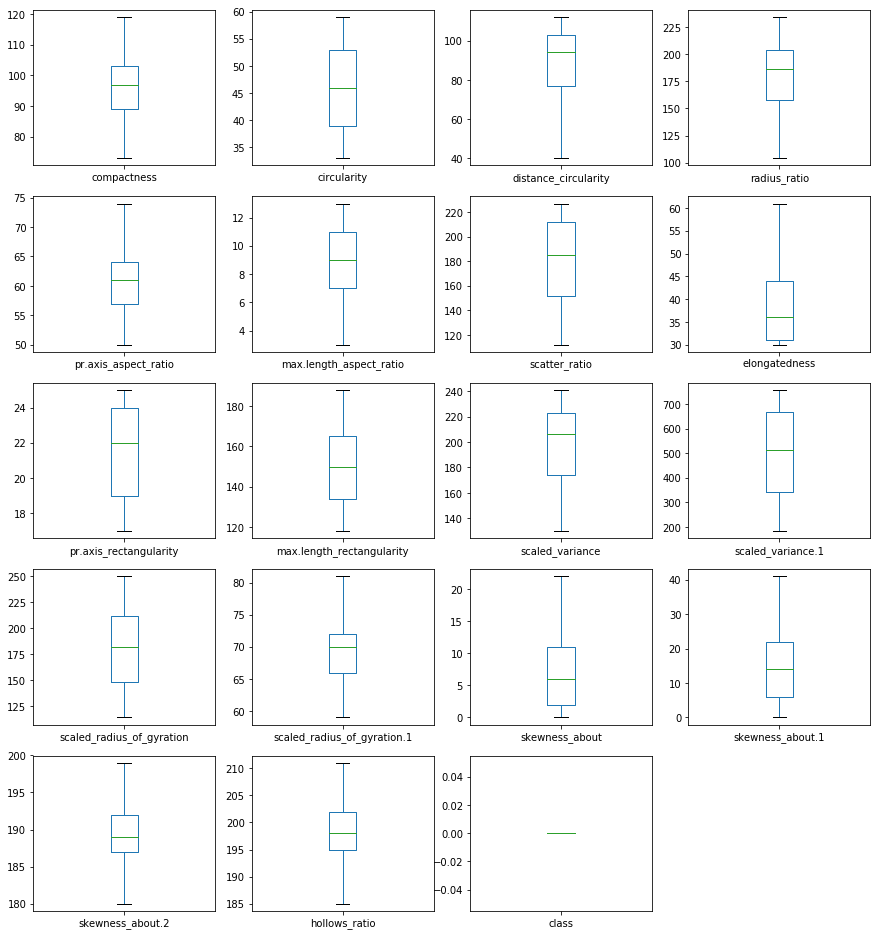

In [175]:
#as observed above, there are still few outliers.
vehc_car = findOutlier(vehc_car,vehc_car.columns)
# box and whisker plots
vehc_car.plot(kind='box', subplots=True,layout = (6,4),sharex=False, sharey=False,figsize=(15,20))
plt.show()

In [176]:
#As seen above, all the outliers for type car has been removed, next we do the same for type bus
vehc_bus= vehc_df[vehc_df["class"]==2]

In [177]:
#missing value treatment for vehicle of type bus
vehc_bus.fillna(vehc_bus.median(),inplace=True)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


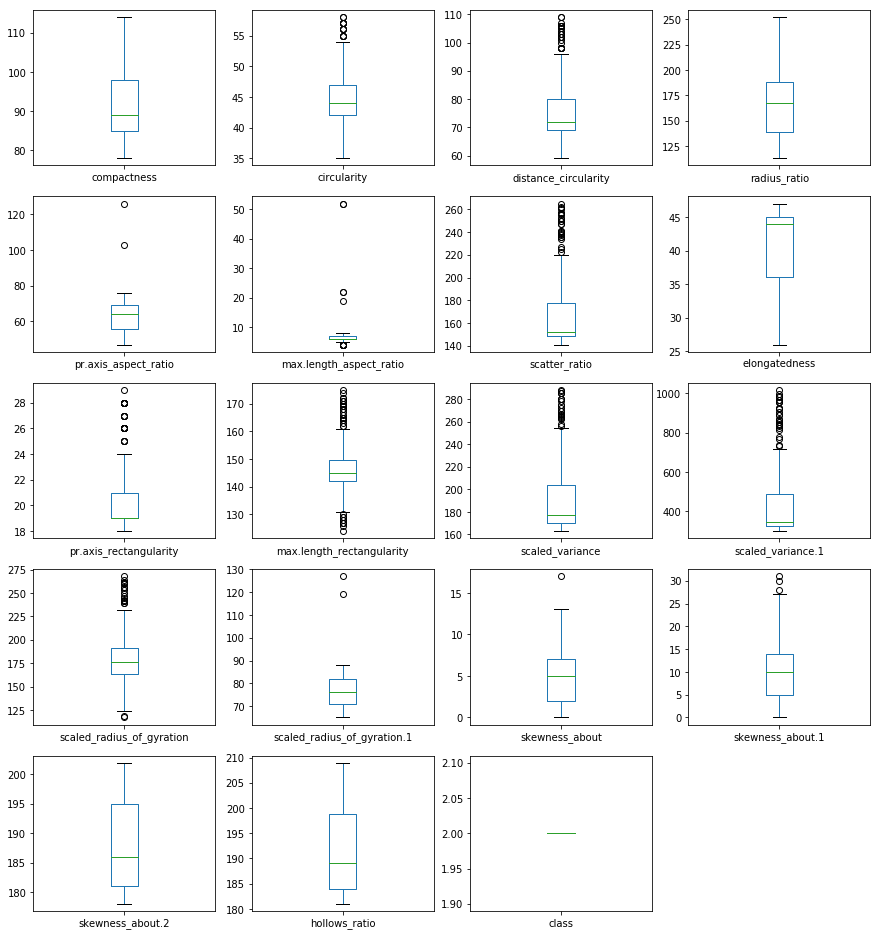

In [178]:
# box and whisker plots
vehc_bus.plot(kind='box', subplots=True,layout = (6,4),sharex=False, sharey=False,figsize=(15,20))
plt.show()

In [179]:
#outlier treatment for vehicle of type bus
# function for outlier treatment
def findOutlier(df,col_name):
    for col in col_name:
        q75,q25=np.percentile(df[col],[75,25])
        iqr=q75-q25
        qmin=q25-(1.5*iqr)
        qmax=q75+(1.5*iqr)
        df.loc[(df[col]<qmin),col]=qmin#qmin#df[col].median()#min()#qmin
        df.loc[(df[col]>qmax),col]=qmax#qmax#df[col].median()#.max()#qmax
    return df

#outlier treatment for vehicle of type bus
vehc_bus = findOutlier(vehc_bus,vehc_bus.columns)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.pat

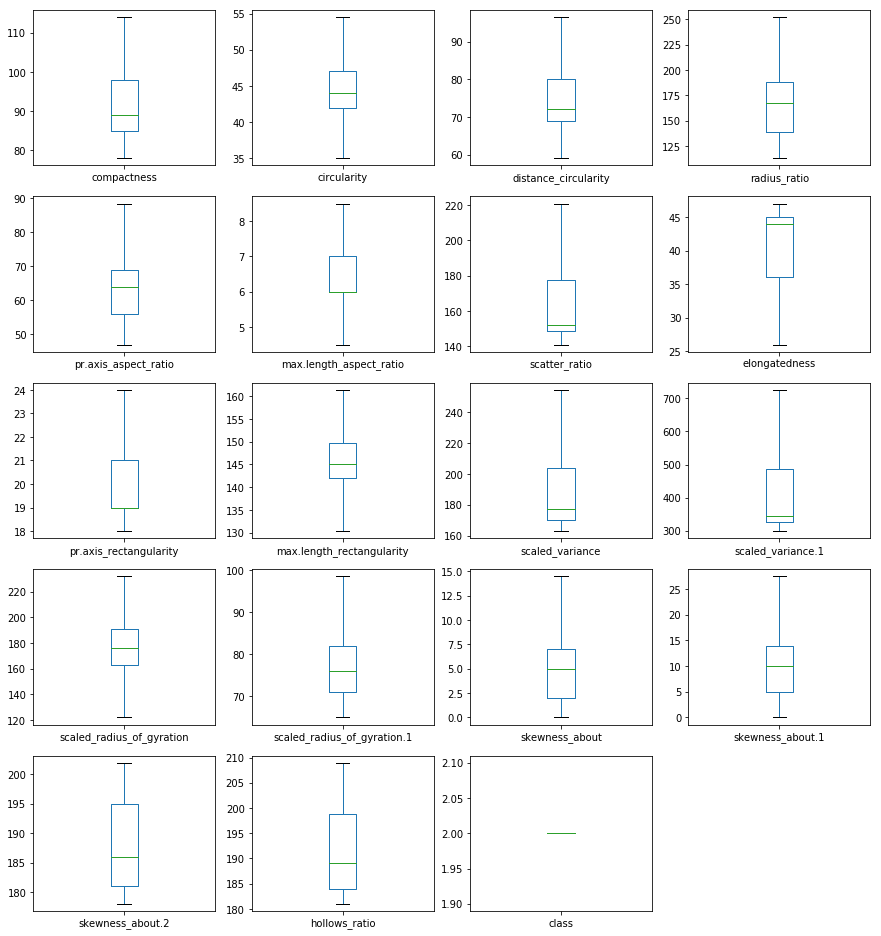

In [180]:
# box and whisker plots
vehc_bus.plot(kind='box', subplots=True,layout = (6,4),sharex=False, sharey=False,figsize=(15,20))
plt.show()

In [181]:
#As seen above, all the outliers for type bus has been removed, next we do the same for type van
vehc_van= vehc_df[vehc_df["class"]==1]

In [182]:
vehc_van.fillna(vehc_van.median(),inplace=True)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


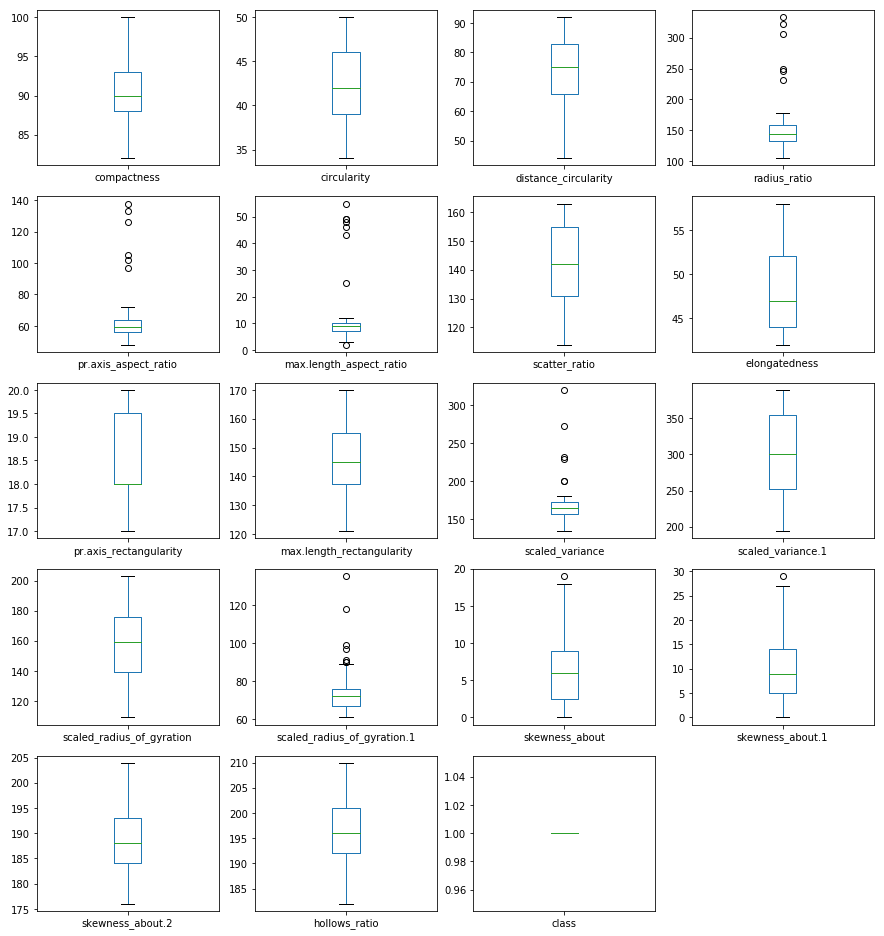

In [183]:
# box and whisker plots
vehc_van.plot(kind='box', subplots=True,layout = (6,4),sharex=False, sharey=False,figsize=(15,20))
plt.show()

In [184]:
vehc_van = findOutlier(vehc_van,vehc_van.columns)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.pat

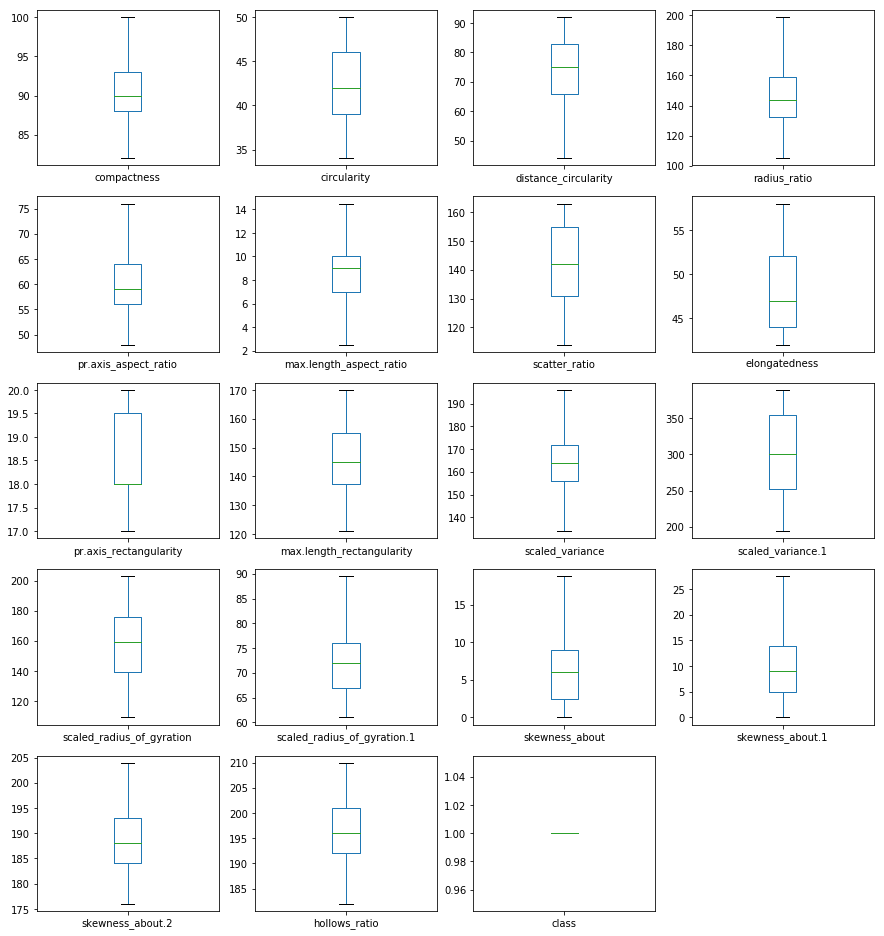

In [185]:
# box and whisker plots
vehc_van.plot(kind='box', subplots=True,layout = (6,4),sharex=False, sharey=False,figsize=(15,20))
plt.show()

In [186]:
vehc_df=pd.concat([vehc_car,vehc_bus,vehc_van],ignore_index=True)
vehc_df.shape

(846, 19)

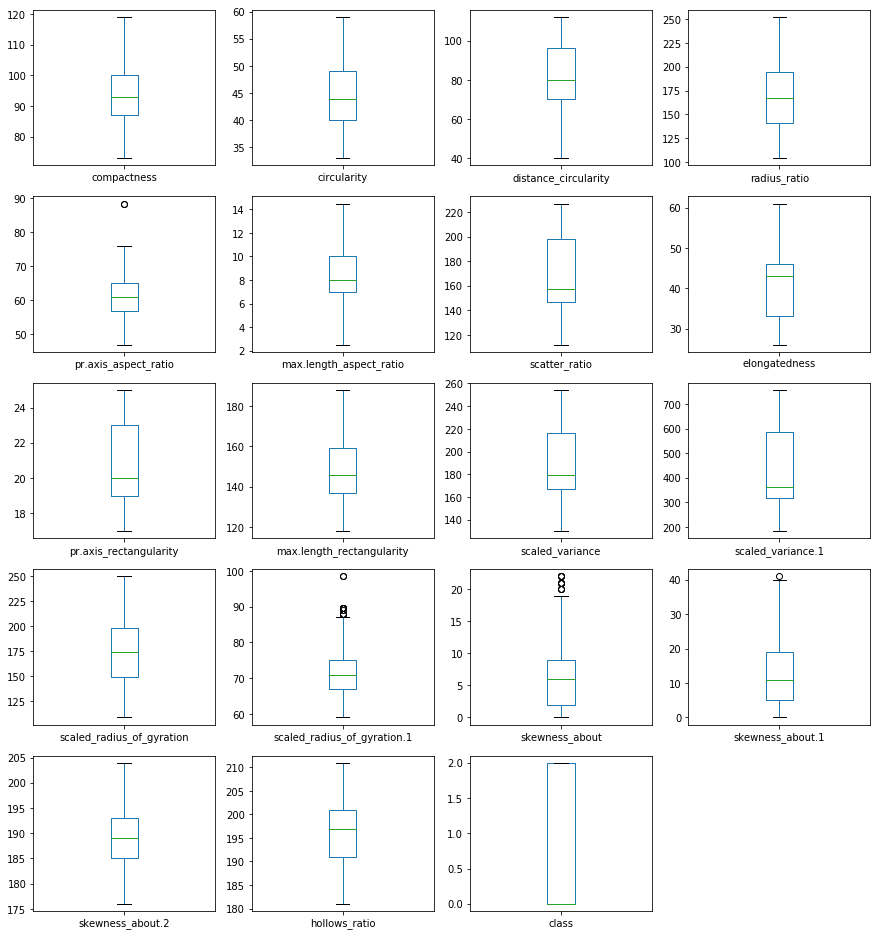

In [187]:
vehc_df.plot(kind='box', subplots=True,layout = (6,4),sharex=False, sharey=False,figsize=(15,20))
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


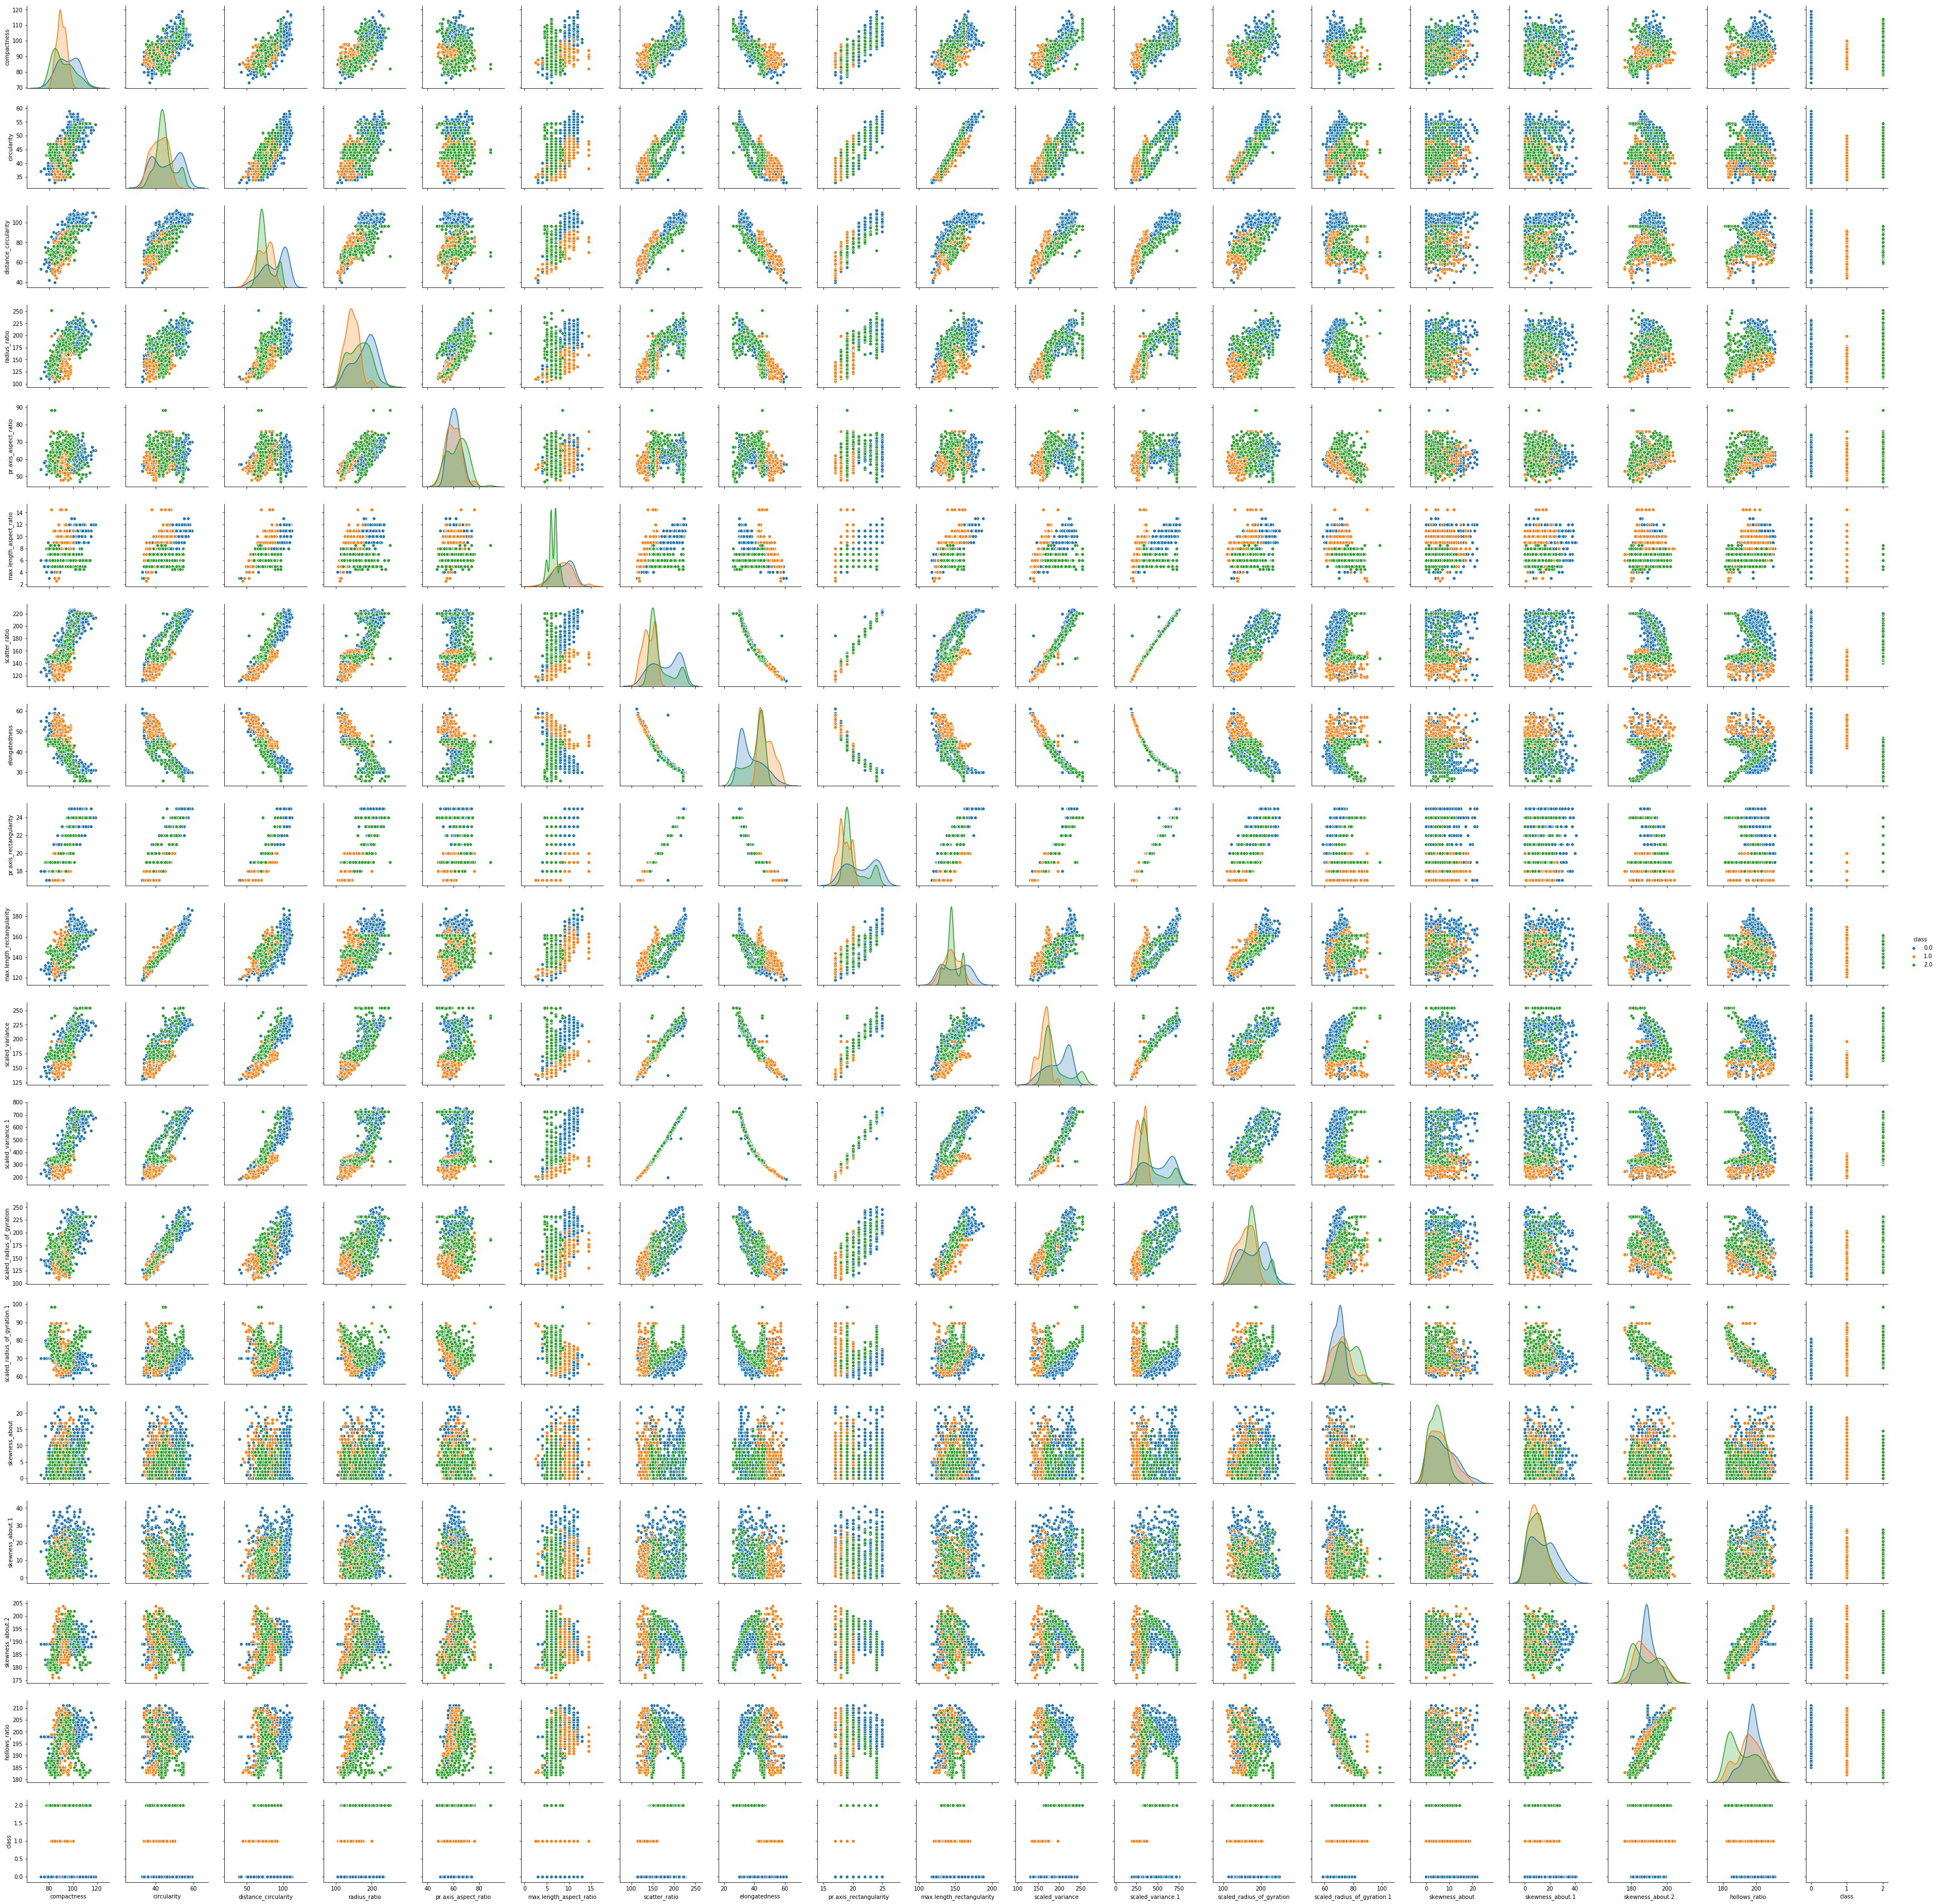

In [106]:
sns.pairplot(vehc_df,hue='class')

##### After considering the pair plot and correlation matrix it is obvious to drop few columns that have very less correlation with each other and keeping only those which have collinearity with each other since PCA helps us to get this covariance information.

In [188]:
vehc_df.drop(['pr.axis_aspect_ratio','scaled_radius_of_gyration.1','skewness_about','skewness_about.1'],axis=1,inplace=True)

In [189]:
# Split the cancer data into separate training (80%) and test (20%) sets and then standardize it to unit variance:
X = vehc_df.drop("class",axis = 1)
y = vehc_df.pop("class")

In [190]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [191]:
from sklearn.preprocessing import StandardScaler
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

In [192]:
cov_matrix = np.cov(X_train_sd.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00148148  0.6865774   0.78025818  0.73215982  0.46766839  0.81281341
  -0.79305234  0.81214786  0.66783142  0.78601561  0.82297063  0.58497936
   0.26560828  0.29745326]
 [ 0.6865774   1.00148148  0.78455567  0.65899906  0.54820182  0.85447742
  -0.8253078   0.85559813  0.95985496  0.81529698  0.85298183  0.9372901
  -0.11313025 -0.03009608]
 [ 0.78025818  0.78455567  1.00148148  0.81289577  0.66158565  0.90386318
  -0.90110866  0.90324502  0.76501054  0.87541507  0.89608859  0.6962506
   0.13063085  0.26019872]
 [ 0.73215982  0.65899906  0.81289577  1.00148148  0.47482719  0.803412
  -0.83664153  0.79132164  0.59963487  0.81932919  0.80297053  0.57772817
   0.37903696  0.41614528]
 [ 0.46766839  0.54820182  0.66158565  0.47482719  1.00148148  0.50456794
  -0.47129919  0.5260974   0.6579892   0.43490451  0.48130058  0.41369801
   0.04505904  0.32134115]
 [ 0.81281341  0.85447742  0.90386318  0.803412    0.50456794  1.00148148
  -0.97438347  0.98873318  0.8067

In [193]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)

print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[-2.70831692e-01 -1.53002162e-01 -1.18410053e-01 -2.57842061e-02
  -8.36159765e-01 -3.41273441e-01 -2.16981629e-01  1.31417165e-01
  -5.92321939e-04  5.63844677e-02 -7.20358185e-02  8.86107402e-03
   1.09879476e-02  2.14066925e-03]
 [-2.92772691e-01  1.57839428e-01  1.59691931e-01  4.25964240e-01
   1.27192913e-02  1.76194510e-02 -1.69438654e-02 -8.58338810e-02
  -1.92310371e-01  3.03802201e-02  5.39067942e-02  5.38339110e-02
   2.02484853e-01 -7.67845466e-01]
 [-3.00689792e-01 -8.32932365e-02  7.69647601e-02 -2.58898969e-01
   1.09140986e-01  1.27416877e-01  1.78039700e-01  6.55135306e-01
  -5.79124162e-01 -1.14824492e-02  5.38780490e-02 -7.95674668e-03
  -2.63802247e-02  3.83367160e-02]
 [-2.70640366e-01 -2.38947612e-01 -1.56368014e-01 -3.21402740e-02
   4.60534268e-01 -6.35324801e-01 -3.22038113e-01 -2.21897402e-01
  -2.32090106e-01 -1.06967781e-01 -6.41548851e-02 -1.63492161e-02
  -3.49397920e-02  6.77170660e-02]
 [-1.94258667e-01 -1.03330323e-01  7.79891800e-01 -3.6

In [194]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
print("Variance Explained", var_exp)

Variance Explained [68.88973821362599, 15.650694633853412, 6.253481582946045, 3.222923350878046, 2.07238728367459, 1.1180869372370246, 0.8514421408186078, 0.723281390268822, 0.5114595269278235, 0.2986136561976173, 0.17558100105552282, 0.1268106528085774, 0.07132913683937107, 0.0341704928685491]


In [195]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 68.88973821  84.54043285  90.79391443  94.01683778  96.08922506
  97.207312    98.05875414  98.78203553  99.29349506  99.59210872
  99.76768972  99.89450037  99.96582951 100.        ]


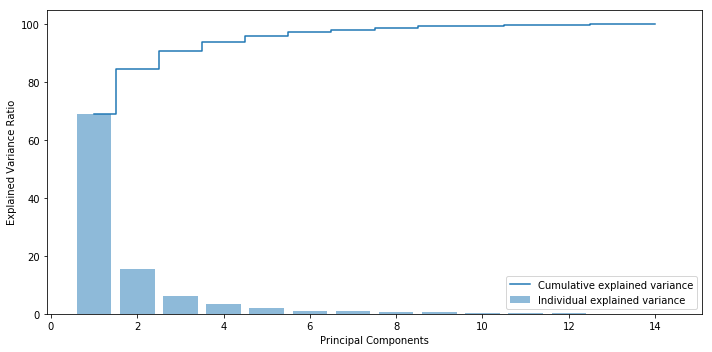

In [196]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

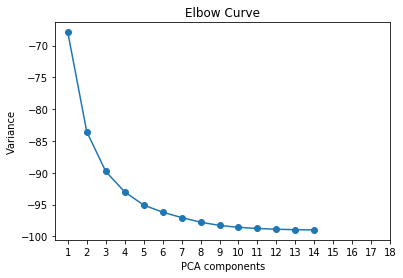

In [197]:
#Elbow plot
unex_var=1-cum_var_exp
x=range(1,15)
plt.plot(x, unex_var, marker='o')
plt.xlabel('PCA components')
plt.ylabel('Variance')
plt.title('Elbow Curve')
plt.xticks(range(1,19))
plt.show()

In [198]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 7)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [199]:
pca.explained_variance_ratio_

array([9.66629527e-01, 1.58661341e-02, 1.04978405e-02, 2.65999960e-03,
       1.43806210e-03, 9.87327443e-04, 8.00921973e-04])

In [200]:
pca.get_covariance()

array([[ 6.03258431e+01,  3.42089403e+01,  9.68564799e+01,
         1.90342237e+02,  8.25097481e+00,  2.07020660e+02,
        -5.11001156e+01,  1.57785531e+01,  7.85335215e+01,
         1.90713070e+02,  1.09440487e+03,  1.50618560e+02,
         1.43112315e+01,  2.05561438e+01],
       [ 3.42089403e+01,  4.05646781e+01,  7.32034709e+01,
         1.27677085e+02,  7.33976965e+00,  1.61966367e+02,
        -3.87432611e+01,  1.24240344e+01,  8.13108354e+01,
         1.45640389e+02,  8.42098163e+02,  1.79253761e+02,
        -4.17090698e+00, -1.22761928e+00],
       [ 9.68564799e+01,  7.32034709e+01,  2.36892010e+02,
         4.00067126e+02,  2.17248745e+01,  4.35965751e+02,
        -1.07786767e+02,  3.31881615e+01,  1.66858771e+02,
         3.97570244e+02,  2.24761842e+03,  3.38766456e+02,
         1.17702374e+01,  2.97716356e+01],
       [ 1.90342237e+02,  1.27677085e+02,  4.00067126e+02,
         1.02413494e+03,  3.27993781e+01,  8.02863272e+02,
        -2.07464444e+02,  6.04210056e+01,  2.

In [201]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [202]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf'],        
     'C': [ 0.01, 0.05, 0.5, 1 ]    } ]

In [203]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [204]:
gs.fit(X_train_pca, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf'], 'C': [0.01, 0.05, 0.5, 1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [205]:
gs.best_estimator_

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [206]:
gs.best_score_ 

0.8328402366863905

In [207]:
y_pred= gs.predict(X_test_pca)

In [208]:
from sklearn import metrics
print('Classification Report:\n\n',metrics.classification_report(y_test,y_pred))

Classification Report:

              precision    recall  f1-score   support

        0.0       0.88      0.86      0.87        85
        1.0       0.93      0.90      0.92        42
        2.0       0.78      0.84      0.81        43

avg / total       0.87      0.86      0.87       170



In [209]:
print('Classification Accuracy:',metrics.accuracy_score(y_test,y_pred)*100,'%')

Classification Accuracy: 86.47058823529412 %


In [210]:
print(metrics.confusion_matrix(y_test,y_pred))

[[73  3  9]
 [ 3 38  1]
 [ 7  0 36]]


In [211]:
pd.crosstab(y_test, y_pred)

col_0  0.0  1.0  2.0
class               
0.0     73    3    9
1.0      3   38    1
2.0      7    0   36